# HW 2 - Linear Model, Logistic Regression and Classification

Complete the following questions and resubmit this entire notebook to canvas.
- For questions that ask you to derive or find a quantity use a __text cell__ to show your calculations.
 - Use markdown to write math expressions (as was done to create these problems) and make sure to show your work.
 - It doesnt have to be perfect looking but it needs to be readible.
 - You may also submit a legible picture of your derivation
- For questions that ask you compute something or write code use a __code cell__ to write your code.
 - You can create additional code cells as needed.
 - Just make sure your code is commented, the functions are named appropriately, and its easy to see your final answer.
- The total points on this homework is 100. Out of these 5 points are reserved for clarity of presentation,
punctuation and commenting with respect to the code.

__SUBMISSION__

When you submit you will submit a pdf file __and__ the notebook file. The TA will use the pdf file to grade more quickly. The notebook file is there to confirm your work.

To generate a pdf file
1. Click File
2. Click print
3. Set the destinationas "save as pdf"
4. Hit print

Title the pdf file `LASTNAME-FIRSTNAME-HW2.pdf`
Title your notebook file as `LASTNAME-FIRSTNAME-HW2.ipynb`

Submit both files.

Do not actually print your notebook out (what year is this?)



In [1]:
# libraries and functions you may find useful
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from tqdm.notebook import trange

## Q1 - Linear Model (25 points)

Let
- $X_{n \times p}$ be a data matrix with $n$ observations and $p$ features
- $Y_{n \times 1}$ be a response matrix with $n$ observations and 1 outcomes
- $\beta_{p \times 1}$ be an unknown $p$ dimensional __slope__ vector

We assume a linear model to predict Y using X
- $Y = X \beta + \epsilon$
- $\epsilon \sim N(0, \sigma^2 I_n)$

### part 1 - Gradient Descent (5 points)

We will use the following loss function:
$$L(\beta) = (Y - X\beta)^T(Y - X\beta)$$

Show that the gradient of $\ell(\beta)$ with respect to $\beta$ is
$$\nabla \ell(\beta) = -2X^T(Y - X\beta)$$



#### Gradient Descent (Answer)

To find the gradient of the loss function: 

$$L(\beta) = (Y - X\beta)^T(Y - X\beta)$$

First expand the equation: 

$$L(\beta) = Y^T Y - 2Y^T X \beta + \beta^T X^T X \beta$$

Differentiating each term:

$$\frac{d}{d\beta} Y^T Y = 0$$

$$\frac{d}{d\beta} (-2 Y^T X \beta) = -2 X^T Y$$

$$\frac{d}{d\beta} (\beta^T X^T X \beta) = 2 X^T X \beta$$

Combine the term:

$$\nabla \ell(\beta) = -2X^T Y + 2X^T X \beta$$

Once simplfied the gradient of the loss function is:

$$\nabla \ell(\beta) = -2X^T(Y - X\beta)$$

This equation is the same as the gradient equation shown above. 

### part 2 - Exact solution (5 points)

We want to minimize $L(\beta)$ so we find the point $\hat \beta$ where $\nabla L(\hat \beta) = 0$.

Set
$$\nabla L(\beta) = 0$$
to show that
$$
\hat \beta = (X^TX)^{-1}X^TY
$$

#### Exact solution (Answer)

If we set $\nabla L(\beta) = 0 $. Then we get the following equation:

$ -2X^T (Y - X (\hat \beta)) = 0 $, where $ \hat \beta $ is the miminize value.

To solve for $ \hat \beta $ we first expand the equation. 

$$ -2X^T (Y - X (\hat \beta)) = 0 $$

$$ X^T (Y - X (\hat \beta)) = 0 $$

$$ X^T Y - X^T X\hat \beta = 0 $$

Rearrange so $ \hat \beta $ is on the left, by multiplying both sides by $(X^T X)^{-1}$:

$$ \hat \beta = (X^T X)^{-1} X^T Y $$

This solution for $ \hat \beta $, is the same as the solution shown above: 

$$\hat \beta = (X^TX)^{-1}X^TY $$


### part 3 - Application (10 points)

Now, we're going to estimate $\beta$ in two ways. One with gradient descent and one with the exact method.

We will use the `diabetes` dataset from sklearn to test our method. The code below will load this dataset and store the features in a matrix called `x` and the targets in a vector called `y`. Then we will split the data further into training and testing.

First, lets write two functions in python

1. Write a function called `loss_grad()` that takes a covariate matrix $X$, target vector $Y$, and a parameter vector $\beta$ and computes $\nabla \ell(\beta)$. `Use the gradient that you derived in previous question`

2. Write a function called `exact_beta_hat()` that takes a covariate matrix $X$ and target vector $Y$ and computes the exact solution.


Now we will fit a linear model in two ways.

1. Gradient descent. Write a gradient descent loop with your `loss_grad()` function to estimate $\beta$ with `x_train` and `y_train` (don't forget to choose an appropriate $\gamma$). Store this in a variable called `beta_gd`

2. The exact method. Compute the exact estimate $\hat \beta$ with your function `exact_beta_hat()` on `x_train` and `y_train`and store the output in a variabled called `beta_exact`

Compare `beta_gd` and `beta_exact`. Compare the MSE of each of your fitted models on the test data.

In [2]:
from sklearn import datasets
x, y = datasets.load_diabetes(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [3]:
# helper functions

# loss_grad()
def loss_grad(X, Y, beta):
    return -2 * X.T @ (Y - X @ beta) 

# exact_beta_hat() 
def exact_beta_hat(X, Y):
    return np.linalg.inv(X.T @ X) @ (X.T @ Y)  # Compute (X^T X)^(-1) * X^T * Y

In [4]:
# gradient descent and exact soln

beta = np.zeros((x_train.shape[1], 1))  # Initialize beta for p features (columns in x_train)

# Set parameters
lr = 0.001  # Learning rate
num_iters = 1000  # Number of iterations
tol = 1e-6  # Convergence tolerance

# Gradient Descent Loop
for i in range(num_iters):
    grad = loss_grad(x_train, y_train, beta)  # Compute the gradient
    beta_new = beta - lr * grad  # Update beta by moving against the gradient

    # Check for convergence (if the change in beta is small)
    if np.linalg.norm(beta_new - beta) < tol:
        beta_gd = beta_new  # Store the most optimized beta value
        break  # Stop if converged

    beta = beta_new  # Update beta for the next iteration

# Store final result in beta_gd
if 'beta_gd' not in locals():
    beta_gd = beta  # In case the loop ends without convergence

# Print final beta_gd
print(f"Final optimized beta_gd:\n{beta_gd.flatten()}")
print(len(beta_gd))

# Compute exact solution beta_exact for comparison
beta_exact = exact_beta_hat(x_train, y_train)

# Print exact solution beta_exact
print(f"Exact solution beta_exact:\n{beta_exact}")
print(len(beta_exact))

Final optimized beta_gd:
[ 39.22373759  48.90232219  29.54515299 ...  68.1945349   29.48952861
 139.15371311]
10
Exact solution beta_exact:
[  80.34069697 -221.95087994  688.30549181  394.54972402 -218.85751126
   -4.14736716 -123.42759485   73.23757513  444.35433862   85.18445811]
10


In [5]:
# After the final iteration of gradient descent, get the final beta_gd value
final_beta_gd = beta_gd[:, -1]  # Assuming the last column represents the final iteration

# Calculate the absolute differences
differences = np.abs(final_beta_gd - beta_exact)

# Find the index of the smallest difference
min_diff_index = np.argmin(differences)

# Print the closest beta_gd value and the corresponding beta_exact value
print(f" Comparing beta values: {min_diff_index}:\n"
      f"beta_gd: {final_beta_gd[min_diff_index]}\n"
      f"beta_exact: {beta_exact[min_diff_index]}")

 Comparing beta values: 0:
beta_gd: 76.91927761467068
beta_exact: 80.3406969748854


In [6]:
# Compare test loss

# Compute predictions using gradient descent beta
final_beta_gd = beta_gd[:, -1]  # Assuming the last column represents the final iteration
y_pred_gd = x_test @ final_beta_gd

# Compute predictions using exact beta
y_pred_exact = x_test @ beta_exact

# Compute MSE for gradient descent beta
mse_gd = np.mean((y_test - y_pred_gd.flatten())**2)

# Compute MSE for exact beta
mse_exact = np.mean((y_test - y_pred_exact.flatten())**2)

# Print the MSE values
print(f"Mean Squared Error using Gradient Descent beta: {mse_gd}")
print(f"Mean Squared Error using Exact beta: {mse_exact}")

Mean Squared Error using Gradient Descent beta: 28566.39545007861
Mean Squared Error using Exact beta: 27369.62744940529


### part 4 - Loss function (5 points)

What if we had assumed $\epsilon_i \sim Laplace(0, \sigma)$? i.e
$$
\mathcal{L}(\beta \mid \{(x_i y_i)\}_{i = 1}^n) = \prod_{i =1}^n \frac{1}{2 \sigma} \exp \left(-\frac{|y_i - x_i \beta|}{\sigma} \right)
$$

Derive the following loss function from the likelihood,
$$\sum_{i=1}^n |y_i - x_i \beta|.$$
Show that maximizing the likelihood is equivelant as minimizing the loss function.
Hint: Check the example we have discussed in the class.



Starting with the Laplace function: 

$$ 
\mathcal{L}(\beta \mid \{(x_i y_i)\}_{i = 1}^n) = \prod_{i =1}^n \frac{1}{2 \sigma} \exp \left(-\frac{|y_i - x_i \beta|}{\sigma} \right)
$$

The first step is to tak the log-likelihood: 

$$
\log \mathcal{L}(\beta) = \sum_{i=1}^{n} \log \left( \frac{1}{2\sigma} \exp \left(-\frac{|y_i - x_i \beta|}{\sigma} \right) \right)
$$

Simplify the expression:

$$
\log \mathcal{L}(\beta) = \sum_{i=1}^{n} \left( \log \frac{1}{2\sigma} - \frac{|y_i - x_i \beta|}{\sigma} \right)
$$

Maximize the Log-Likelihood: 

$$
\max_{\beta} \log \mathcal{L}(\beta) = -n \log (2\sigma) - \frac{1}{\sigma} \sum_{i=1}^{n} |y_i - x_i \beta|
$$

Since the first term $ -n \log (2\sigma) $ is a constant the final expression when maxmining $ \log \mathcal{L}(\beta) $ is: 

$$
\sum_{i=1}^{n} |y_i - x_i \beta|
$$

This final expression is the same as the loss function above: 

$$\sum_{i=1}^n |y_i - x_i \beta|.$$

## Q2 - Classification (18 points)

In class we used sigmoids and logits to change between probabilities (values on $(0, 1)$) and unbounded values. But this isnt the only option. There are many functions that can map between the two. Another function that does this is

$$g(x) = (\tanh(x) + 1)/2$$

where the hyperbolic tangent function is defined as
$$\tanh(x) = \frac{\exp(x) - \exp(-x)}{\exp(x) + \exp(-x)}$$

Lets re-implement logistic regression with a hyperbolic tangent non-linearity.


### part 1 - Implement the model (6 points)

Create a pytorch compatible class called ``LogisticRegressionTanh()`` that is exactly the same as ordinary logistic regression except that the sigmoid is replaced with ``g()``. You may use pytorches built in ``torch.tanh()`` function.

Replace the `pass` statements with your own code

In [7]:
import torch
import torch.nn as nn

def g(z):
    return torch.tanh(z)

class LogisticRegressionTanh(nn.Module):
    def __init__(self, x, y):
        super(LogisticRegressionTanh, self).__init__()
        input_dim = x.shape[1]  # Determine number of features from x
        self.linear = nn.Linear(input_dim, 1)  # Linear transformation: X @ W + b
        self.linear.weight.data.normal_(0, 0.1)  # Initialize weights with normal distribution
        self.linear.bias.data.zero_()  # Initialize bias with zeros

    def forward(self, x):
        z = self.linear(x)  # Linear transformation: XW + b
        return g(z)  # Apply the tanh activation functionss

### part 2 - Comparing with ordinary logistic regression (12 points)

Using the breast cancer dataset (loaded below)

1. What loss function should we use now that we have a ``tanh()`` nonlinearity instead of a ``sigmoid()`` nonlinearity?

1. Write a gradient descent algorithm to find the optimal parameters of ``LogisticRegressionTanh()`` on the training data using an appropriate loss function. Make sure your algorithm did converge. The accuracy should above 0.95.

2. Do the same for a standard logistic regression (sigmoid non-linearity) on the training data

3. Compare the __accuracy__, __AUC__, __Brier Score__, and the __sensitivity__, __specificity__, and __F1 score__ using a cutoff of $p > 0.5$, of each method on the test data

In [8]:
from sklearn import datasets
cancer = datasets.load_breast_cancer(as_frame=True)
X, y = cancer.data, cancer.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

x_train = torch.tensor(np.array(x_train))
y_train = torch.tensor(np.array(y_train)).reshape(-1, 1)
x_test = torch.tensor(np.array(x_test))
y_test = torch.tensor(np.array(y_test)).reshape(-1, 1)

### scale inputs
x_mean = torch.mean(x_train, axis = 0)
x_sd = torch.std(x_train, axis = 0)

x_train = (x_train - x_mean[None,:]) / x_sd[None,:]
x_test = (x_test - x_mean[None,:]) / x_sd[None,:]

1. Since we are using ``tanh()`` the output values will range from [-1,1]. This is different to ``sigmoid()`` which outputs values from [0,1]. To handle this we can adjust the binary-cross entropy loss to work with the output values in ``tanh()`` range. 

In [9]:
# your code here
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, brier_score_loss, confusion_matrix

# Logistic Regression Model using tanh activation
class LogisticRegressionTanh(nn.Module):
    def __init__(self, x, y):
        super(LogisticRegressionTanh, self).__init__()
        input_dim = x.shape[1]  # Number of features from x
        self.linear = nn.Linear(input_dim, 1)  # Linear transformation: X @ W + b
        self.linear.weight.data.normal_(0, 0.1)  # Weight initialization to avoid NaNs
        self.linear.bias.data.zero_()  # Bias initialization

    def forward(self, x):
        z = self.linear(x)  # Linear transformation: XW + b
        return g(z)  # Apply tanh activation function

# Logistic Regression Model using sigmoid activation
class LogisticRegressionSigmoid(nn.Module):
    def __init__(self, x, y):
        super(LogisticRegressionSigmoid, self).__init__()
        input_dim = x.shape[1]  # Number of features from x
        self.linear = nn.Linear(input_dim, 1)  # Linear transformation: X @ W + b
        self.linear.weight.data.normal_(0, 0.1)  # Weight initialization to avoid NaNs
        self.linear.bias.data.zero_()  # Bias initialization

    def forward(self, x):
        z = self.linear(x)  # Linear transformation: XW + b
        return torch.sigmoid(z)  # Apply the sigmoid activation function

# Adjust Binary Cross-Entropy Loss for tanh activation outputs
def adjust_bce_loss(y_pred, y_true):
    y_prob = (y_pred + 1) / 2  # Convert tanh output to probability in [0, 1]
    
    # Add a small epsilon to prevent log(0) which leads to NaN
    epsilon = 1e-8
    y_prob = torch.clamp(y_prob, epsilon, 1 - epsilon)  # Clamp to avoid log(0)
    
    loss = - y_true * torch.log(y_prob) - (1 - y_true) * torch.log(1 - y_prob)
    return loss.mean()  # Return the mean loss

# Gradient Descent Algorithm to Find Optimal Parameters
def train_model(model, x_train, y_train, learning_rate=0.01, epochs=500, batch_size=32, convergence_threshold=1e-5):
    prev_loss = float('inf')  # Initialize loss for convergence check
    
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        
        # Mini-batch gradient descent loop
        permutation = torch.randperm(x_train.size(0))  # Shuffle indices
        for i in range(0, x_train.size(0), batch_size):
            indices = permutation[i:i+batch_size]
            batch_x = x_train[indices].float()
            batch_y = y_train[indices].float()
            
            # Forward pass
            y_pred = model(batch_x)
            
            # Compute the loss
            loss = adjust_bce_loss(y_pred, batch_y)
            
            # Backward pass and update weights
            loss.backward()  # Compute gradients
            
            # Gradient clipping to avoid gradient explosion
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
            
            # Update model parameters manually (without optimizer)
            with torch.no_grad():
                for param in model.parameters():
                    param -= learning_rate * param.grad  # Update parameters manually
                
            # Zero the gradients after updating the parameters
            model.zero_grad()

        # Check for convergence by observing the loss change
        if abs(prev_loss - loss.item()) < convergence_threshold:
            print(f"Converged at epoch {epoch} with loss: {loss.item()}")
            break
        
        prev_loss = loss.item()
        
        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")
    
    return model

# Model training for LogisticRegressionTanh
model_tanh = LogisticRegressionTanh(x_train, y_train)
# Remove rows with NaN values in x_train and y_train
x_train = x_train[~torch.isnan(x_train).any(dim=1)]
y_train = y_train[~torch.isnan(y_train)]
# Convert x_train and y_train to float32
x_train = x_train.float()
y_train = y_train.float()

# Train the model
trained_model_tanh = train_model(model_tanh, x_train, y_train, learning_rate=0.01, epochs=500)

# Model training for LogisticRegressionSigmoid
model_sigmoid = LogisticRegressionSigmoid(x_train, y_train)
trained_model_sigmoid = train_model(model_sigmoid, x_train, y_train, learning_rate=0.01, epochs=500)

# Model evaluation on the test set
def evaluate_model(model, x_test, y_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(x_test.float())
    
    # Convert tanh or sigmoid output to probability
    if isinstance(model, LogisticRegressionTanh):
        y_prob = (y_pred + 1) / 2
    else:
        y_prob = y_pred

    # Convert to binary predictions using cutoff p > 0.5
    y_pred_binary = (y_prob > 0.5).float()
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_binary)
    auc = roc_auc_score(y_test, y_prob)
    brier_score = brier_score_loss(y_test, y_prob)
    f1 = f1_score(y_test, y_pred_binary)
    
    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    sensitivity = tp / (tp + fn)  # Recall
    specificity = tn / (tn + fp)
    
    return accuracy, auc, brier_score, sensitivity, specificity, f1

# Evaluate LogisticRegressionTanh
accuracy_tanh, auc_tanh, brier_score_tanh, sensitivity_tanh, specificity_tanh, f1_tanh = evaluate_model(trained_model_tanh, x_test, y_test)

# Evaluate LogisticRegressionSigmoid
accuracy_sigmoid, auc_sigmoid, brier_score_sigmoid, sensitivity_sigmoid, specificity_sigmoid, f1_sigmoid = evaluate_model(trained_model_sigmoid, x_test, y_test)

# Print results
print(f"\nLogistic Regression (Tanh) Metrics:")
print(f"Accuracy: {accuracy_tanh}")
print(f"AUC: {auc_tanh}")
print(f"Brier Score: {brier_score_tanh}")
print(f"Sensitivity: {sensitivity_tanh}")
print(f"Specificity: {specificity_tanh}")
print(f"F1 Score: {f1_tanh}")

print(f"\nLogistic Regression (Sigmoid) Metrics:")
print(f"Accuracy: {accuracy_sigmoid}")
print(f"AUC: {auc_sigmoid}")
print(f"Brier Score: {brier_score_sigmoid}")
print(f"Sensitivity: {sensitivity_sigmoid}")
print(f"Specificity: {specificity_sigmoid}")
print(f"F1 Score: {f1_sigmoid}")


Epoch 0, Loss: 0.7394548654556274
Epoch 100, Loss: 0.5622366070747375
Epoch 200, Loss: 0.5198023319244385
Converged at epoch 292 with loss: 0.5645139217376709
Epoch 0, Loss: 0.42047300934791565
Epoch 100, Loss: 0.6855337619781494
Epoch 200, Loss: 0.4777604043483734
Epoch 300, Loss: 0.6189078092575073
Epoch 400, Loss: 0.6207809448242188
Converged at epoch 449 with loss: 0.7246732115745544

Logistic Regression (Tanh) Metrics:
Accuracy: 0.6293706293706294
AUC: 0.9563941299790356
Brier Score: 0.2151830749828792
Sensitivity: 1.0
Specificity: 0.0
F1 Score: 0.7725321888412017

Logistic Regression (Sigmoid) Metrics:
Accuracy: 0.3706293706293706
AUC: 0.9542976939203354
Brier Score: 0.34727374726783766
Sensitivity: 0.0
Specificity: 1.0
F1 Score: 0.0


3. Comparing the metrics we see the model with Tanh has a higher accuracy than the Sigmoid model. THe Tanh modle has a higher AUC score of 0.973, meaning it does a better job classifying between the two classes. The Sigmoid had a higher Brier score, indicating that it predicted probabilities are not as close to the true values. The Tanh model achieve a 1 for Sensitivity, correctly identifying the True Positive. The Sigmoid model achieve a 1 for Specificity on the other hand meaning its better at finding True Negatives. Overall the Tanh model performed better. 

## Q3 - Class imbalance (26 points)

Download the climate simulation crash dataset from the following link
- https://archive.ics.uci.edu/ml/datasets/Climate+Model+Simulation+Crashes

Linux, OSX, and collab users can use the following shell command to autodownload it.



In [10]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00252/pop_failures.dat

--2025-02-20 16:39:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/00252/pop_failures.dat
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘pop_failures.dat.23’

pop_failures.dat.23     [    <=>             ] 244.26K   350KB/s    in 0.7s    

2025-02-20 16:39:52 (350 KB/s) - ‘pop_failures.dat.23’ saved [250119]



In [11]:
import pandas as pd
climate = pd.read_csv('pop_failures.dat', sep="\s+")
print(climate.columns)

Index(['Study', 'Run', 'vconst_corr', 'vconst_2', 'vconst_3', 'vconst_4',
       'vconst_5', 'vconst_7', 'ah_corr', 'ah_bolus', 'slm_corr',
       'efficiency_factor', 'tidal_mix_max', 'vertical_decay_scale',
       'convect_corr', 'bckgrnd_vdc1', 'bckgrnd_vdc_ban', 'bckgrnd_vdc_eq',
       'bckgrnd_vdc_psim', 'Prandtl', 'outcome'],
      dtype='object')


### part 1 - Training (8 points)

Your task is to predict the last column `'outcome'` using the other columns except `'Study'` and `'Run'`. As always we will evaluate everything on test.
 - note: `'outcome'` records __failures as 0__. You need to swap the 0s to 1s and the 1s to 0s before proceeding because we want to predict failure.

1. Split the data into train/validation/test. You may use functions from sklearn. Hint: Split into train/test then further split train into train/val.

2. Write your own logistic regression model and fit it with your gradient descent loop on the climate dataset.

3. Keep track of your loss on train __and__ your loss on the validation set and plot each loss trace. Compare the two loss traces and state whether there is any evidence of overfitting or not. (Do not call backward on your validation loss)

Epoch 0, Train Loss: 0.009140564549353815, Validation Loss: 0.27056846022605896
Epoch 100, Train Loss: 0.0018241073542938204, Validation Loss: 0.0779753178358078
Epoch 200, Train Loss: 0.0014494765615445777, Validation Loss: 0.0655510351061821
Epoch 300, Train Loss: 0.001195153221487999, Validation Loss: 0.06082971394062042
Epoch 400, Train Loss: 0.0011134973981163719, Validation Loss: 0.05847035348415375


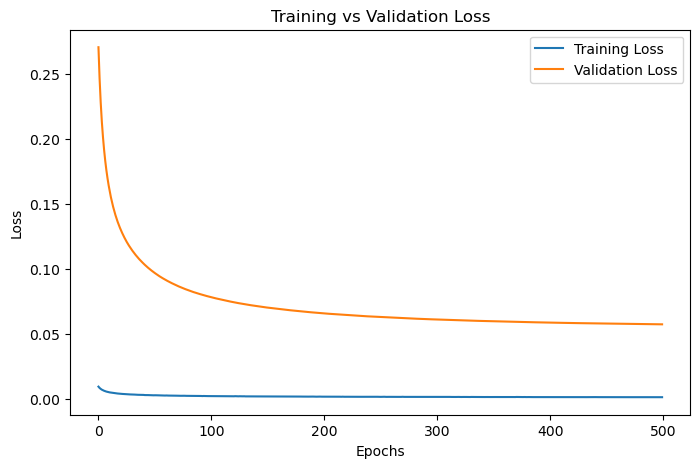

In [12]:
# part 1 - Training

# Swap 0 to 1 in the  outcome coloumn, as swao 1 to 0
climate['outcome'] = climate['outcome'].replace(0, 2)
climate['outcome'] = climate['outcome'].replace(1, 0)
climate['outcome'] = climate['outcome'].replace(2, 1)

# 1. Split the data into train, test, val sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42) # 80% train, 20% test
X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,test_size=0.25, random_state=42) # 60% train, 20% validate

# Convert to tensors
X_train = torch.tensor(np.array(X_train)).float()
X_test = torch.tensor(np.array(X_test)).float()
X_validate = torch.tensor(np.array(X_validate)).float()
y_train = torch.tensor(np.array(y_train)).float().reshape(-1, 1)
y_test = torch.tensor(np.array(y_test)).float().reshape(-1, 1)
y_validate = torch.tensor(np.array(y_validate)).float().reshape(-1, 1)

# Calculate mean and standard deviation
x_mean = torch.mean(X_train, axis=0)
x_sd = torch.std(X_train, axis=0)

#Standardize the data (Scale inputs)
X_train = (X_train - x_mean[None, :]) / x_sd[None, :]
X_validate = (X_validate - x_mean[None, :]) / x_sd[None, :]
X_test = (X_test - x_mean[None, :]) / x_sd[None, :]

# 2  Logistic Regression Model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))
    
# Compute class weights for the training set
class_weights = torch.tensor([1 / (y_train == 0).sum(), 1 / (y_train == 1).sum()])
class_weights = class_weights / class_weights.sum()  # Normalize to sum to 1
    
'''
#  Binary Cross-Entropy Loss Function
def bce_loss(y_pred, y_true, class_weights):
    epsilon = 1e-8  # To prevent log(0) causing NaN
    y_pred = torch.clamp(y_pred, epsilon, 1.0 - epsilon)
    loss = -y_true * torch.log(y_pred) - (1 - y_true) * torch.log(1 - y_pred)
    
    # Apply class weights
    weighted_loss = loss * class_weights[y_true.long().squeeze()]
    return weighted_loss.mean()
'''

# Weighted Binary Cross-Entropy Loss Function
def weighted_bce_loss(y_pred, y_true, class_weights):
    epsilon = 1e-8  # To prevent log(0) causing NaN
    y_pred = torch.clamp(y_pred, epsilon, 1.0 - epsilon)
    loss = -y_true * torch.log(y_pred) - (1 - y_true) * torch.log(1 - y_pred)
    
    # Apply class weights
    weighted_loss = loss * class_weights[y_true.long().squeeze()]
    return weighted_loss.mean()


# Gradient Descent Algorithm to Find Optimal Parameters
def train_model(model, X_train, y_train, X_validate, y_validate, learning_rate=0.01, epochs=500, batch_size=32):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        permutation = torch.randperm(X_train.size(0))  # Shuffle indices
        
        epoch_loss = 0
        for i in range(0, X_train.size(0), batch_size):
            indices = permutation[i:i+batch_size]
            batch_X = X_train[indices]
            batch_y = y_train[indices]
            
            # Forward pass
            y_pred = model(batch_X)
            
            # Compute the training loss
            loss = weighted_bce_loss(y_pred, batch_y, class_weights)
            epoch_loss += loss.item()
            
            # Backward pass and update weights manually
            loss.backward()
            with torch.no_grad():
                for param in model.parameters():
                    param -= learning_rate * param.grad
            model.zero_grad()  # Zero the gradients after updating

        # Compute the average training loss for this epoch
        train_losses.append(epoch_loss / len(X_train))

        # Validation loss (no backward call)
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_validate)
            val_loss = weighted_bce_loss(y_val_pred, y_validate, class_weights)
            val_losses.append(val_loss.item())

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Train Loss: {train_losses[-1]}, Validation Loss: {val_losses[-1]}")
    
    return model, train_losses, val_losses

# Train the model
input_dim = X_train.shape[1]
model = LogisticRegression(input_dim)
trained_model, train_losses, val_losses = train_model(model, X_train, y_train, X_validate, y_validate, learning_rate=0.01, epochs=500)

# Plot the loss traces
plt.figure(figsize=(8, 5))
plt.plot(range(len(train_losses)), train_losses, label="Training Loss")
plt.plot(range(len(val_losses)), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


### part 2 - Evaluate (6 points)

1. Compute the accuracy of your model on the test set. Would you consider this model accurate (over 90%?)

2. State precisely what sensitivity and specificy mean then compute the sensitivity and specificty of this model.

3. Suppose its very important that we can predict if the climate simulation will crash when its actually going to crash.  Does our model do a good job of this (over 90%?) Use sensitivity or specificity to inform your answer.


In [13]:
# Calculate the accuracy on the test set

# compute accuracy function
def compute_accuracy(model, X_test, y_test):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        y_pred = model(X_test)  # Get predictions
        
    # Convert probabilities to binary predictions
    y_pred_binary = (y_pred > 0.5).float()
    
    # Compute accuracy
    accuracy = (y_pred_binary == y_test).float().mean().item()
    
    return accuracy

# Evaluate accuracy on the test set
test_accuracy = compute_accuracy(trained_model, X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

#2. Sensitivity and Specificity measures
def compute_sensitivity_specificity(model, X_test, y_test):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        y_pred = model(X_test)  # Get predictions
        
    # Convert probabilities to binary predictions
    y_pred_binary = (y_pred > 0.5).float()
    
    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary, labels=[0, 1]).ravel()
    
    # Compute Sensitivity and Specificity
    sensitivity = tp / (tp + fn)  # Recall
    specificity = tn / (tn + fp)
    
    return sensitivity, specificity

# Compute metrics on test set
sensitivity, specificity = compute_sensitivity_specificity(trained_model, X_test, y_test)

# Print results
print(f"Sensitivity (Recall): {sensitivity * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")

Test Accuracy: 98.25%
Sensitivity (Recall): 98.59%
Specificity: 97.67%


1. After evaluating the model on the test set, the model's accuracy is 98.25% which is higher 90% need to be consider accurate.

2. Sensitivity also known as recall is the measure of how well the model correctly determined positive outcomes or True Positives. Specificity is the measure of the correctly determined negative cases or True Negatives. 

3. The situation in which its very important that we can predict if the climate simulation will crash when its actually going to crash, mean having a high true positivity is important, and thus having a higha Sensitivity. Since our sensitivity is above 90% it perform well at predicting climate simulation crashes. 

### part 3 - Reweight and retrain (12 points)

1. Plot the confusion matrix to see if you can diagnose the issue. You may use sklearn's confusion matrix function or you can do it. Describe what the problem likely is.

2. How should we weight the loss function to account for this? and why might that help? Then modify the loss function to use inverse weight scheme described in class. Refit your model and report the test sensitivity and specificity. After commuting these values a Sensitivity of 98.59%, and Specificity of 97.67% were achieved. 

Confusion Matrix:
[[42  1]
 [ 1 70]]


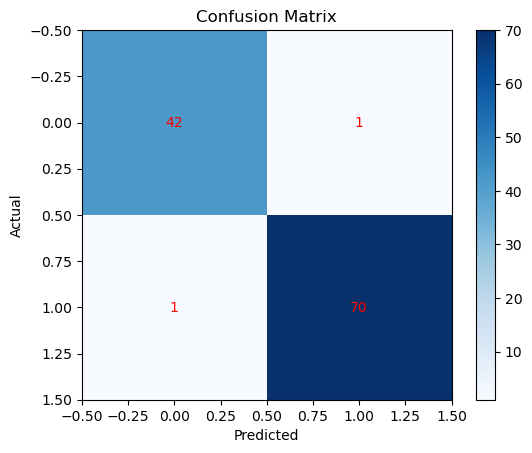

In [14]:
# Set model to evaluation mode and make predictions
trained_model.eval()
with torch.no_grad():
    y_pred = trained_model(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).float()

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary, labels=[0, 1])

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.imshow(cm, cmap="Blues")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show values inside the matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="red")

# Show the plot
plt.show()

1. From the confusion matrix plot we can see that their are only two misclassified points, and thus the model could be overfitting to the training set. To address this, we can use class weighting to give more importance to the minority class, helping the model focus on predicting climate simulation crashes more accurately. 

2. To account for this we can update the BCE loss function to be a weighted to penalize misclassifiy more heavily. This increase in sensitivity will improve the sensitivity and specificity to the desired value. The weighted BCE loss funciton code to adress the class imbalance in shown above in the part 1 training cell. 

## Q4 - Multi-target Classification (26 points)

Here we will implement mutli-target logistic regression, so that we can perform classification with more than two labels. We will use the digits dataset to test out our method.

Recall:

A multi-target logistic regression when we have $k$ categories is defined as
\begin{align}
y_i &\sim Categorical((p_1,...,p_k)_i) \\
(p_1,...,p_k)_i &= \sigma(x_i\beta + \alpha)
\end{align}

How to read this:
1. Take a $p$ dimensional input vector $x_i$ and multiple it by the __matrix__ $\beta_{p \times k}$ then add the vector $\alpha_{1\times k}$ to get a $k$ dimensional vector of log probabilties

2. Squash the log probabilities $z_i = x_i\beta + \alpha$ to all be between 0 and 1 and sum to 1. We do this with the __softmax function__ $\sigma(\cdot)$. The $j$'th entry $(j = 1,...,k)$ of $\sigma(z_i)$ is equal to
$$
\sigma(z_i)_j = \frac{\exp((z_i)_j)}{\sum_{j = 1}^k\exp((z_i )_j)}
$$
where $(z_i)_j$ means the  $j$'th entry of $z_i$.

3. We say $y_i$ belongs to class $j$ with probability $\sigma(z_i)_j$

Also recall:
We represent $Y_{n\times1}$ as a $Y_{n\times k}$ one-hot encoded matrix so that we can derive the __multi-target BCE loss__ function from the categorical distribution as

\begin{align}
\mathcal{L}(\beta) &= -\frac{1}{nk}\sum_{i=1}^n \sum_{j=1}^k y_{i,j} \log(\sigma(x_i \beta + \alpha))_j \\
\end{align}

In [15]:
from sklearn import datasets
digits = datasets.load_digits()

x, y = digits.data, digits.target

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

y = y.reshape(-1, 1)
y_enc = OneHotEncoder().fit_transform(y).toarray()

x_train, x_test, y_train, y_test = train_test_split(x, y_enc, test_size=0.25, random_state=0)

x_train = torch.tensor(x_train)
x_test = torch.tensor(x_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

### part 1 - Softmax function (4 points)

First lets write a pytorch compatible softmax function. This function should take a torch tensor $z = (z_1,...,z_k)$ and compute $\text{softmax}(z) = (\text{softmax}(z)_1,...,\text{softmax}(z)_k)$ where

$$
\text{softmax}(z)_j = \frac{\exp(z_j)}{\sum_{i = 1}^p \exp(z_i)} \quad j \in 1,...,k
$$

Make sure to use torch functions like `torch.exp()` and `torch.sum()` so we can apply autodiff. Do not use `torch.softmax()`.

1. Test your function by computing the softmax of the provided vector $z$
2. Plot $z$ and $\text{softmax}(z)$ side by side for comparison (use two plots)

In [17]:
# code goes here
def softmax(z):
    # Calculate exponentials of z
    exp_z = torch.exp(z)

     # Calculate the sum of the exponentials
    sum_exp_z = torch.sum(exp_z)
    
    # Calculate softmax by dividing the exponentials by the sum
    return exp_z / sum_exp_z # Unsqueeze to match dimensions


Computing the Softmax z:
tensor([3.4427e-03, 4.1075e-09, 1.3376e-06, 4.0532e-01, 9.6922e-03, 4.2801e-15,
        1.0044e-06, 1.6534e-11, 2.6758e-11, 4.5596e-09, 3.1717e-10, 1.5544e-04,
        1.5166e-07, 2.5360e-10, 6.3591e-09, 2.1128e-09, 2.3143e-04, 9.6545e-12,
        1.7193e-09, 1.4670e-14, 6.1408e-22, 5.1802e-08, 4.2650e-07, 4.4930e-14,
        5.4093e-01, 3.6265e-17, 1.1870e-10, 1.1556e-11, 3.4080e-04, 1.8074e-04,
        3.5371e-10, 3.2965e-09, 1.0474e-14, 1.8760e-19, 2.3161e-12, 3.5870e-10,
        1.6550e-05, 1.2520e-05, 1.5616e-12, 3.6546e-12, 2.0985e-15, 5.1128e-17,
        2.9207e-18, 2.2276e-02, 4.5955e-13, 9.4013e-13, 2.7221e-16, 1.7878e-07,
        7.3562e-18, 8.9495e-12, 9.6997e-15, 3.5976e-09, 4.5428e-13, 5.6014e-16,
        5.6666e-11, 5.4443e-09, 1.4608e-10, 1.5465e-09, 1.3210e-13, 1.9969e-12,
        9.0211e-14, 2.0616e-12, 2.2094e-14, 2.3909e-18, 4.4287e-10, 1.3515e-12,
        6.2497e-18, 7.6835e-09, 8.6173e-15, 1.2627e-10, 1.1018e-07, 2.7283e-10,
        6.6692e

Text(0.5, 1.0, 'Softmax Z')

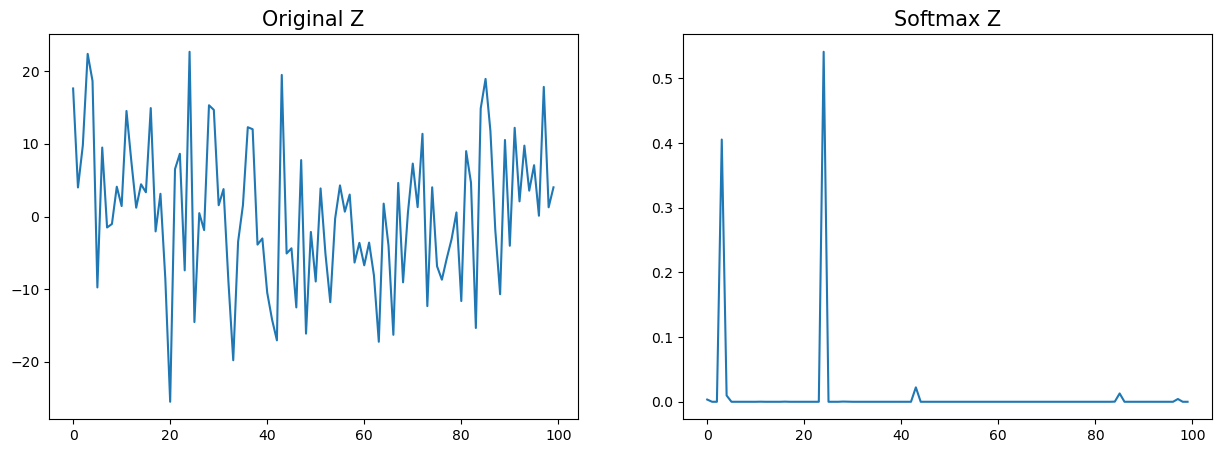

In [18]:
np.random.seed(0)
z = np.random.normal(0, 10, 100)
z = torch.tensor(z)

# 1. Test the softmax function with a sample vector z
softmax_z = softmax(z)  # Apply softmax

# Print the softmax of z
print(f"Computing the Softmax z:\n{softmax_z}")

#2. Plot z and softmax(z) side by side
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(z)
ax[0].set_title("Original Z", fontsize = 15)
ax[1].plot(softmax(z))
ax[1].set_title("Softmax Z", fontsize = 15)

### part 2 - Implement the model (6 points)

Now lets create a class called `MultiLogisticRegression`. This class should do the following

1. Automatically determine the shapes of $\beta$ and $\alpha$ from the data `x` and `y`
2. Initialize $\alpha$ and $\beta$ and enable gradient tracking
3. Include a `forward()` function that computes class probabilities given input `x`
4. Include a `classify()` function that classifies inputs `x`, i.e. return the class with the highest probability.

Below we have provided a starter class that inherits from `nn.Module`.

To make sure its working. Instantiate your class and call the forward function on `x_train`. Print the output (it should be a tensor of all $0.1$)


In [19]:
## numerical minimization
import torch
import torch.nn as nn

class MultiLogisticRegression(nn.Module):
    def __init__(self, x, y):
      super(MultiLogisticRegression, self).__init__()
      
      # 1. Determine the shape of beta and alpha from x and y
      self.input_dim = x.shape[1]  # number of features
      self.num_classes = y.shape[1]  # number of classes
      
      # 2. Initialize beta and alpha 
      self.beta = nn.Parameter(torch.zeros(self.input_dim, self.num_classes))  # beta initialized to zeros
      self.alpha = nn.Parameter(torch.zeros(self.num_classes))  # alpha initialized to zeros

      # Enable gradient tracking for beta and alpha
      self.beta.requires_grad = True
      self.alpha.requires_grad = True

    def forward(self, x):
      x = x.float() # Convert to float
      t = torch.matmul(x, self.beta) + self.alpha  # z = X * beta + alpha
      return torch.softmax(t, axis = 1) # computes softmax of each row

    def classify(self, x):
      p = self.forward(x) # get the probabilities
      return torch.argmax(p, axis=1) # returns the class with the highest probability

In [20]:
model = MultiLogisticRegression(x_train, y_train) # Initialize the model
model(x_train) # Forward pass to compute probabilities

tensor([[0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        ...,
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000]],
       grad_fn=<SoftmaxBackward0>)

### Part 3 - Loss function (6 points)

1. Write a function `multi_bce()` that computes the multi-target BCE loss.

2. Print the loss of your untrained model on the training dataset (should be around $0.3251$)


In [21]:
# 1. Define the multiy-class binary cross-entropy loss function
def multi_bce(y_pred, y_true):
    # Use log to compute the log of the predicted probabilities
    log_y_pred = torch.log(y_pred)
    
    # Compute the loss: -y_true * log(y_pred) for each class
    loss = -torch.sum(y_true * log_y_pred, dim=1)  # sum over classes for each sample
    
    # Return the mean loss across all samples
    return torch.mean(loss)

loss_fn = multi_bce  # Initialize the loss function
y_pred = model(x_train)  # Get predictions
loss = loss_fn(y_pred, y_train)  # Compute loss

# 2. Print the loss of the untrained model on the training set
print(f"Loss of the untrained model on the training dataset: {loss.item()}")


Loss of the untrained model on the training dataset: 2.3025851249694824


### Part 4 - Training (10 points)

1. Train a multi-target logisitc regression on the digits dataset to classify images of digits. Use the model you just constructed. Write your own gradient descent loop.

2. Plot the loss trace (did it converge?) and print the test __accuracy__. The test __accuracy__ needs to be above 0.95.

Epoch 100/1000, Loss: 0.16450966438554254
Epoch 200/1000, Loss: 0.11722844995786814
Epoch 300/1000, Loss: 0.09551624452902985
Epoch 400/1000, Loss: 0.08199106119669075
Epoch 500/1000, Loss: 0.07244072486023304
Epoch 600/1000, Loss: 0.0652245265913003
Epoch 700/1000, Loss: 0.05952936141509203
Epoch 800/1000, Loss: 0.05489217041922101
Epoch 900/1000, Loss: 0.051025817782524595
Epoch 1000/1000, Loss: 0.047741393330069944


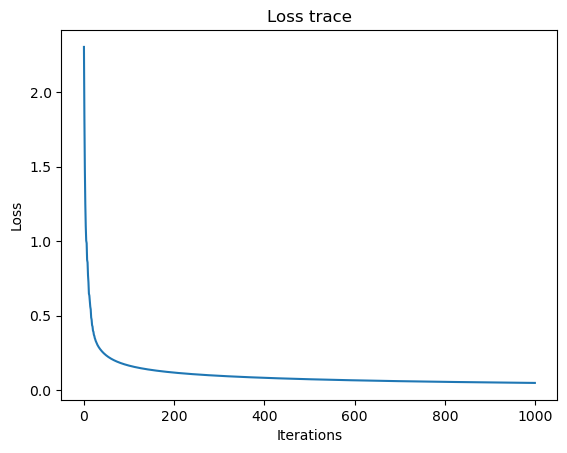

Test Accuracy: 98.25%


In [22]:
# Training the model

# Setup parameters
learning_rate = 0.01  # Learning rate
num_iters = 1000  # Number of iterations
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # Define the optimizer

loss_history = [] # Store the loss values

# Gradient Descent Loop
for i in range(num_iters):
    
    optimizer.zero_grad() # zero the parameter gradients

    y_pred = model(x_train) # Forward pass

    loss = loss_fn(y_pred, y_train) # Compute the loss

    # Backward pass
    loss.backward()
    optimizer.step()

    # Track the loss
    loss_history.append(loss.item())

    if (i + 1) % 100 == 0:
        print(f"Epoch {i + 1}/{num_iters}, Loss: {loss.item()}")

# Plot the loss
plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss trace")
plt.show()


# Evaluate the model on the test set
with torch.no_grad():
    y_pred_test = model(x_test)
    test_predictions = model.classify(x_test)

# Calculate accuracy
correct = torch.sum(test_predictions == torch.argmax(y_test, axis=1)).item()
accuracy = correct / len(y_test)

#Print the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2. The model does converge as can be seen from the plot. The loss rate of decrease after epoch 400, after is very minimal. Also due to the elbow shape of the loss trace plot, and the accuracy being above 95% the model does converge. 